In [4]:
import os
import glob

# Define the WSL path to the folder
folder_path = '/mnt/d/newDownloads/10ClassMilDataset'

def count_images_in_folder(folder_path):
    # Count total number of images in folder and subfolders
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif']  # Add other image extensions if needed
    total_images = 0
    
    for extension in image_extensions:
        # Use glob to find all images with the given extension in the folder and subfolders
        files = glob.glob(os.path.join(folder_path, '**', extension), recursive=True)
        total_images += len(files)
    
    return total_images

# Get the total number of images
total_images = count_images_in_folder(folder_path)
print(f"Total number of images: {total_images}")


Total number of images: 18596


In [5]:
import os

# Define the base directory path
base_dir = '/mnt/d/newDownloads/10ClassMilDataset'

def count_images(base_path):
    total_count = 0
    train_count = 0
    val_count = 0
    test_count = 0

    # Iterate over each class directory
    for class_folder in os.listdir(base_path):
        class_path = os.path.join(base_path, class_folder)
        if os.path.isdir(class_path):
            # Count images in each class folder
            for subfolder in os.listdir(class_path):
                subfolder_path = os.path.join(class_path, subfolder)
                if os.path.isdir(subfolder_path):
                    # Count images in subfolder
                    image_count = sum([len(files) for r, d, files in os.walk(subfolder_path) if files])
                    
                    # Update counts based on subfolder names
                    if 'train' in subfolder.lower():
                        train_count += image_count
                    elif 'val' in subfolder.lower() or 'validation' in subfolder.lower():
                        val_count += image_count
                    elif 'test' in subfolder.lower():
                        test_count += image_count
                    
                    # Update total count
                    total_count += image_count

    return total_count, train_count, val_count, test_count

# Perform the counting
total_images, train_images, val_images, test_images = count_images(base_dir)

# Print the results
print(f"Total Images: {total_images}")
print(f"Training Images: {train_images}")
print(f"Validation Images: {val_images}")
print(f"Test Images: {test_images}")


Total Images: 18596
Training Images: 10414
Validation Images: 4463
Test Images: 3719


Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Anti-aircraft
Found image for class 'Anti-aircraft': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Anti-aircraft/Anti-aircraft_0_100.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored combat support vehicles
Found image for class 'Armored combat support vehicles': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored combat support vehicles/Armored combat support vehicles_0_0.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored personnel carriers
Found image for class 'Armored personnel carriers': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored personnel carriers/Armored personnel carriers_0_1.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Infantry fighting vehicles
Found image for class 'Infantry fighting vehicles': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Infan

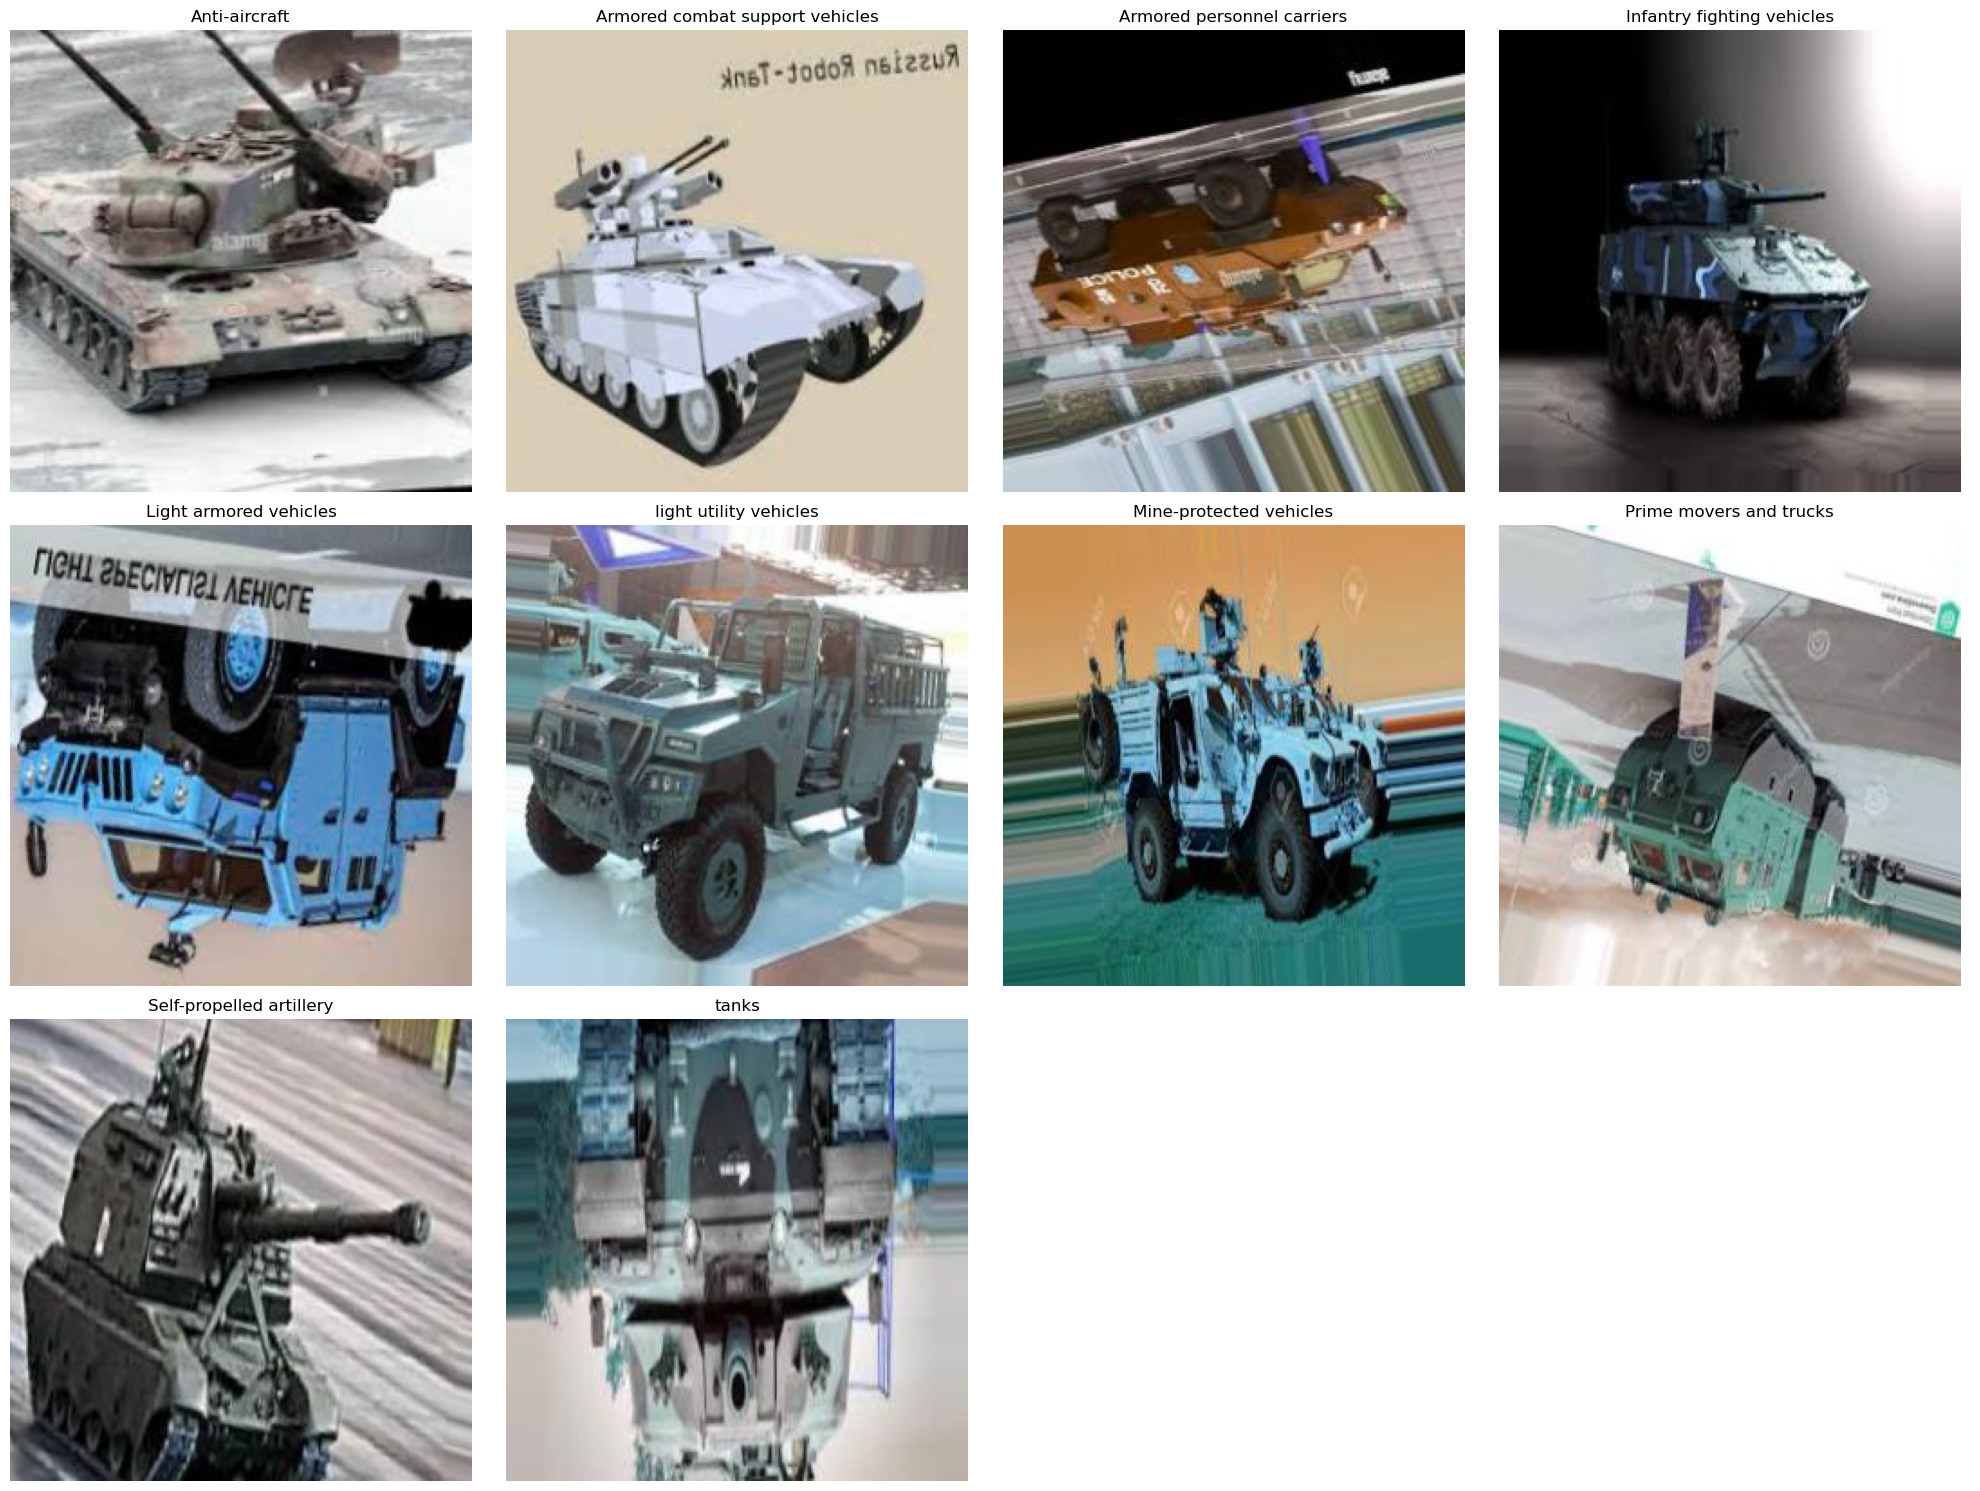

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Define the base directory path in WSL format
base_dir = '/mnt/d/newDownloads/10ClassMilDataset/dataset/train'

def get_image_paths(base_path):
    image_paths = {}
    
    # Iterate over each class directory
    for class_folder in os.listdir(base_path):
        class_path = os.path.join(base_path, class_folder)
        if os.path.isdir(class_path):
            print(f"Checking class directory: {class_path}")  # Debug: print current class path
            # Look for image files in the class subfolder
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
            if image_files:
                image_path = os.path.join(class_path, image_files[0])  # Take only one image per class
                print(f"Found image for class '{class_folder}': {image_path}")  # Debug: print found image path
                image_paths[class_folder] = image_path
    return image_paths

def display_images(image_paths):
    if not image_paths:
        raise ValueError("No images found. Check the directory structure and image formats.")
    
    # Create a grid with 4 columns, adjust rows based on number of classes
    num_classes = len(image_paths)
    num_rows = (num_classes + 3) // 4  # Adjust rows for any number of classes
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
    axes = axes.flatten() if num_classes > 1 else [axes]  # Handle case with a single class

    for ax, (class_name, image_path) in zip(axes, image_paths.items()):
        try:
            img = Image.open(image_path)
            ax.imshow(img)
            ax.set_title(class_name)
            ax.axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            ax.axis('off')
    
    # Hide any extra subplots
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get image paths and display images
image_paths = get_image_paths(base_dir)
display_images(image_paths)


Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Anti-aircraft
Found image for class 'Anti-aircraft': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Anti-aircraft/Anti-aircraft_0_100.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored combat support vehicles
Found image for class 'Armored combat support vehicles': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored combat support vehicles/Armored combat support vehicles_0_0.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored personnel carriers
Found image for class 'Armored personnel carriers': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored personnel carriers/Armored personnel carriers_0_1.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Infantry fighting vehicles
Found image for class 'Infantry fighting vehicles': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Infan

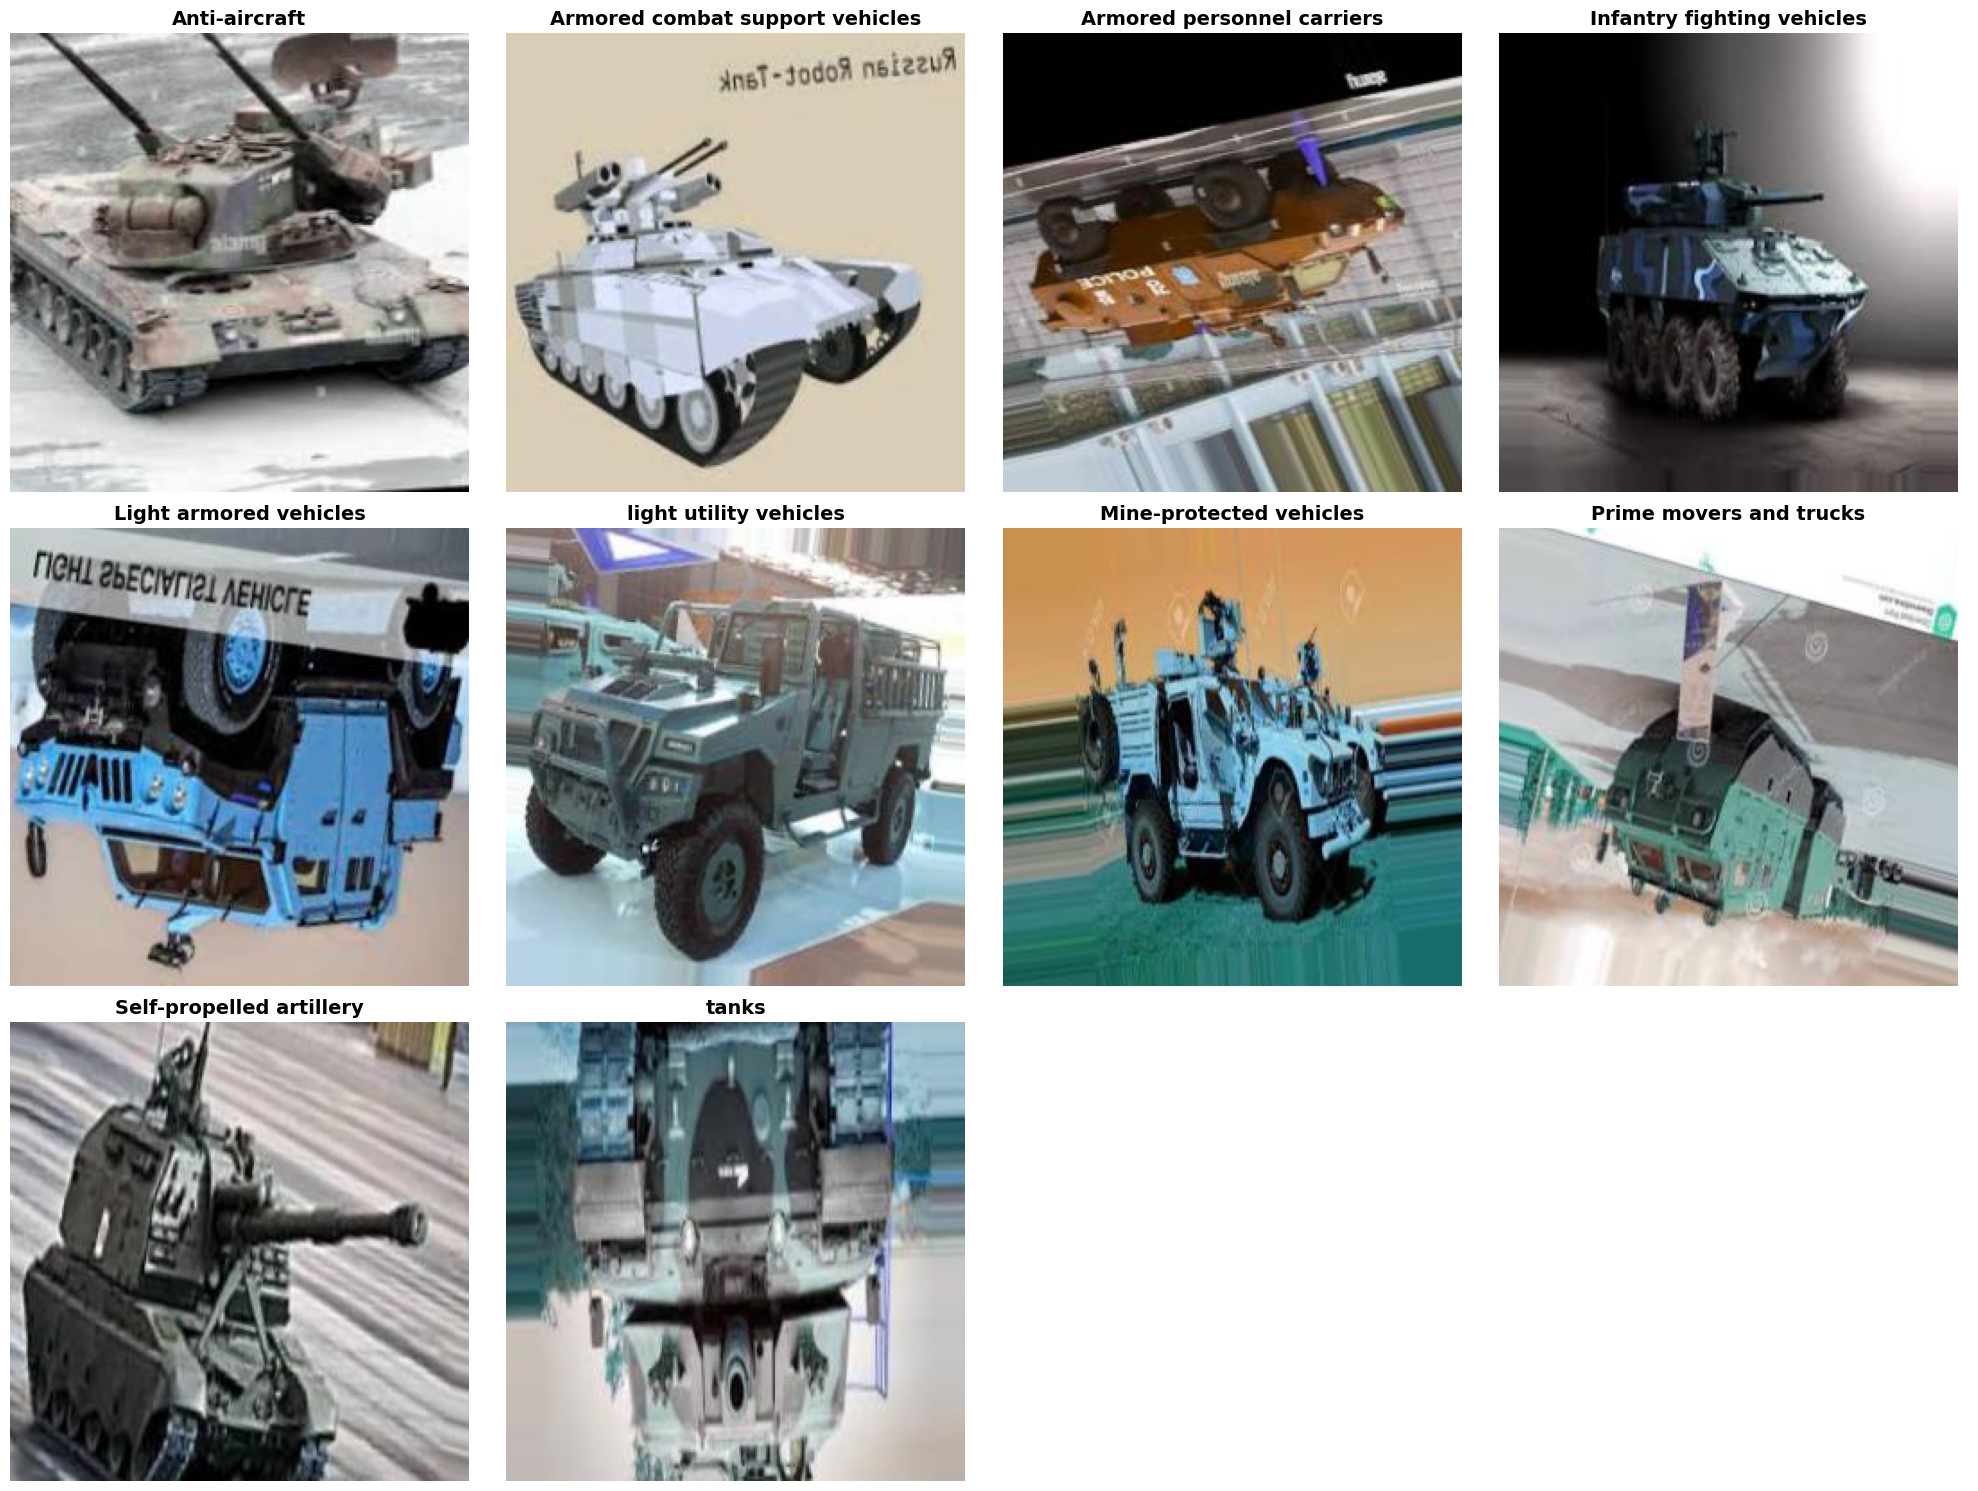

In [17]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Define the base directory path in WSL format
base_dir = '/mnt/d/newDownloads/10ClassMilDataset/dataset/train'

def get_image_paths(base_path):
    image_paths = {}
    
    # Iterate over each class directory
    for class_folder in os.listdir(base_path):
        class_path = os.path.join(base_path, class_folder)
        if os.path.isdir(class_path):
            print(f"Checking class directory: {class_path}")  # Debug: print current class path
            # Look for image files in the class subfolder
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
            if image_files:
                image_path = os.path.join(class_path, image_files[0])  # Take only one image per class
                print(f"Found image for class '{class_folder}': {image_path}")  # Debug: print found image path
                image_paths[class_folder] = image_path
    return image_paths

def display_images(image_paths):
    if not image_paths:
        raise ValueError("No images found. Check the directory structure and image formats.")
    
    # Create a grid with 4 columns, adjust rows based on number of classes
    num_classes = len(image_paths)
    num_rows = (num_classes + 3) // 4  # Adjust rows for any number of classes
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
    axes = axes.flatten() if num_classes > 1 else [axes]  # Handle case with a single class

    for ax, (class_name, image_path) in zip(axes, image_paths.items()):
        try:
            img = Image.open(image_path)
            ax.imshow(img)
            ax.set_title(class_name, fontdict={'fontsize': 14, 'fontweight': 'bold'})
            ax.axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            ax.axis('off')
    
    # Hide any extra subplots
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get image paths and display images
image_paths = get_image_paths(base_dir)
display_images(image_paths)


Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Anti-aircraft
Selected random image for class 'Anti-aircraft': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Anti-aircraft/Anti-aircraft_0_8399.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored combat support vehicles
Selected random image for class 'Armored combat support vehicles': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored combat support vehicles/Armored combat support vehicles_0_9699.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored personnel carriers
Selected random image for class 'Armored personnel carriers': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored personnel carriers/Armored personnel carriers_0_1635.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Infantry fighting vehicles
Selected random image for class 'Infantry fighting vehicles': /mnt/d/new

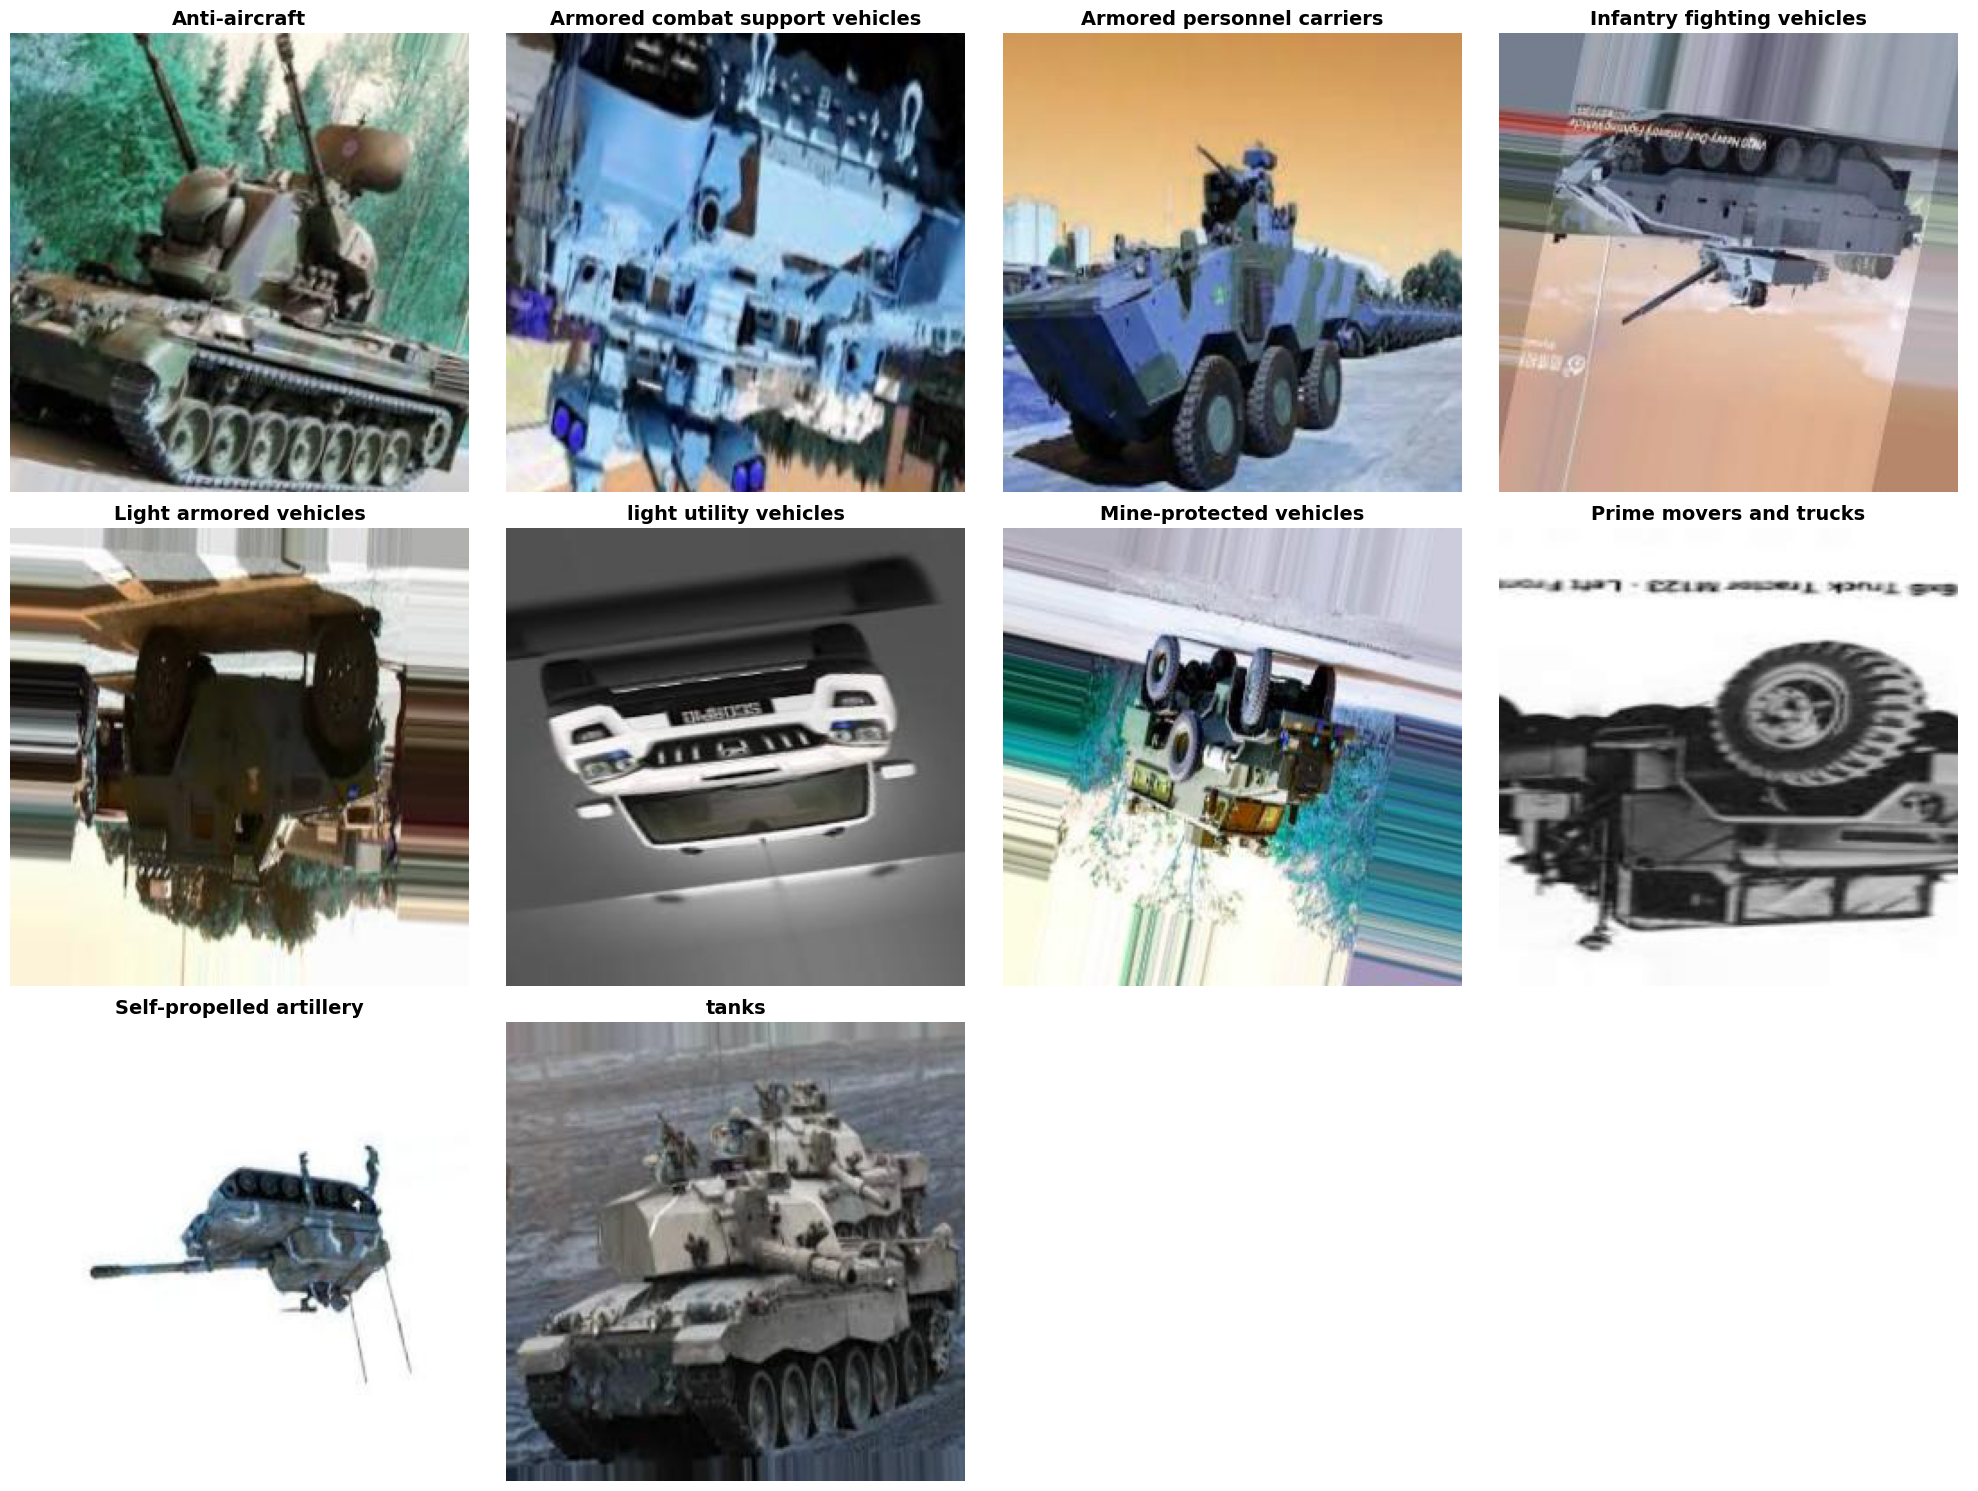

In [28]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the base directory path in WSL format
base_dir = '/mnt/d/newDownloads/10ClassMilDataset/dataset/train'

def get_random_image_paths(base_path):
    image_paths = {}
    
    # Iterate over each class directory
    for class_folder in os.listdir(base_path):
        class_path = os.path.join(base_path, class_folder)
        if os.path.isdir(class_path):
            print(f"Checking class directory: {class_path}")  # Debug: print current class path
            # Look for image files in the class subfolder
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
            if image_files:
                # Pick a random image from the list
                image_path = os.path.join(class_path, random.choice(image_files))
                print(f"Selected random image for class '{class_folder}': {image_path}")  # Debug: print selected image path
                image_paths[class_folder] = image_path
    return image_paths

def display_images(image_paths):
    if not image_paths:
        raise ValueError("No images found. Check the directory structure and image formats.")
    
    # Create a grid with 4 columns, adjust rows based on number of classes
    num_classes = len(image_paths)
    num_rows = (num_classes + 3) // 4  # Adjust rows for any number of classes
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
    axes = axes.flatten() if num_classes > 1 else [axes]  # Handle case with a single class

    for ax, (class_name, image_path) in zip(axes, image_paths.items()):
        try:
            img = Image.open(image_path)
            ax.imshow(img)
            ax.set_title(class_name, fontdict={'fontsize': 14, 'fontweight': 'bold'})
            ax.axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            ax.axis('off')
    
    # Hide any extra subplots
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get random image paths and display images
image_paths = get_random_image_paths(base_dir)
display_images(image_paths)


Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Anti-aircraft
Selected random image for class 'Anti-aircraft': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Anti-aircraft/Anti-aircraft_0_7932.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored combat support vehicles
Selected random image for class 'Armored combat support vehicles': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored combat support vehicles/Armored combat support vehicles_0_1964.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored personnel carriers
Selected random image for class 'Armored personnel carriers': /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Armored personnel carriers/Armored personnel carriers_0_2459.jpeg
Checking class directory: /mnt/d/newDownloads/10ClassMilDataset/dataset/train/Infantry fighting vehicles
Selected random image for class 'Infantry fighting vehicles': /mnt/d/new

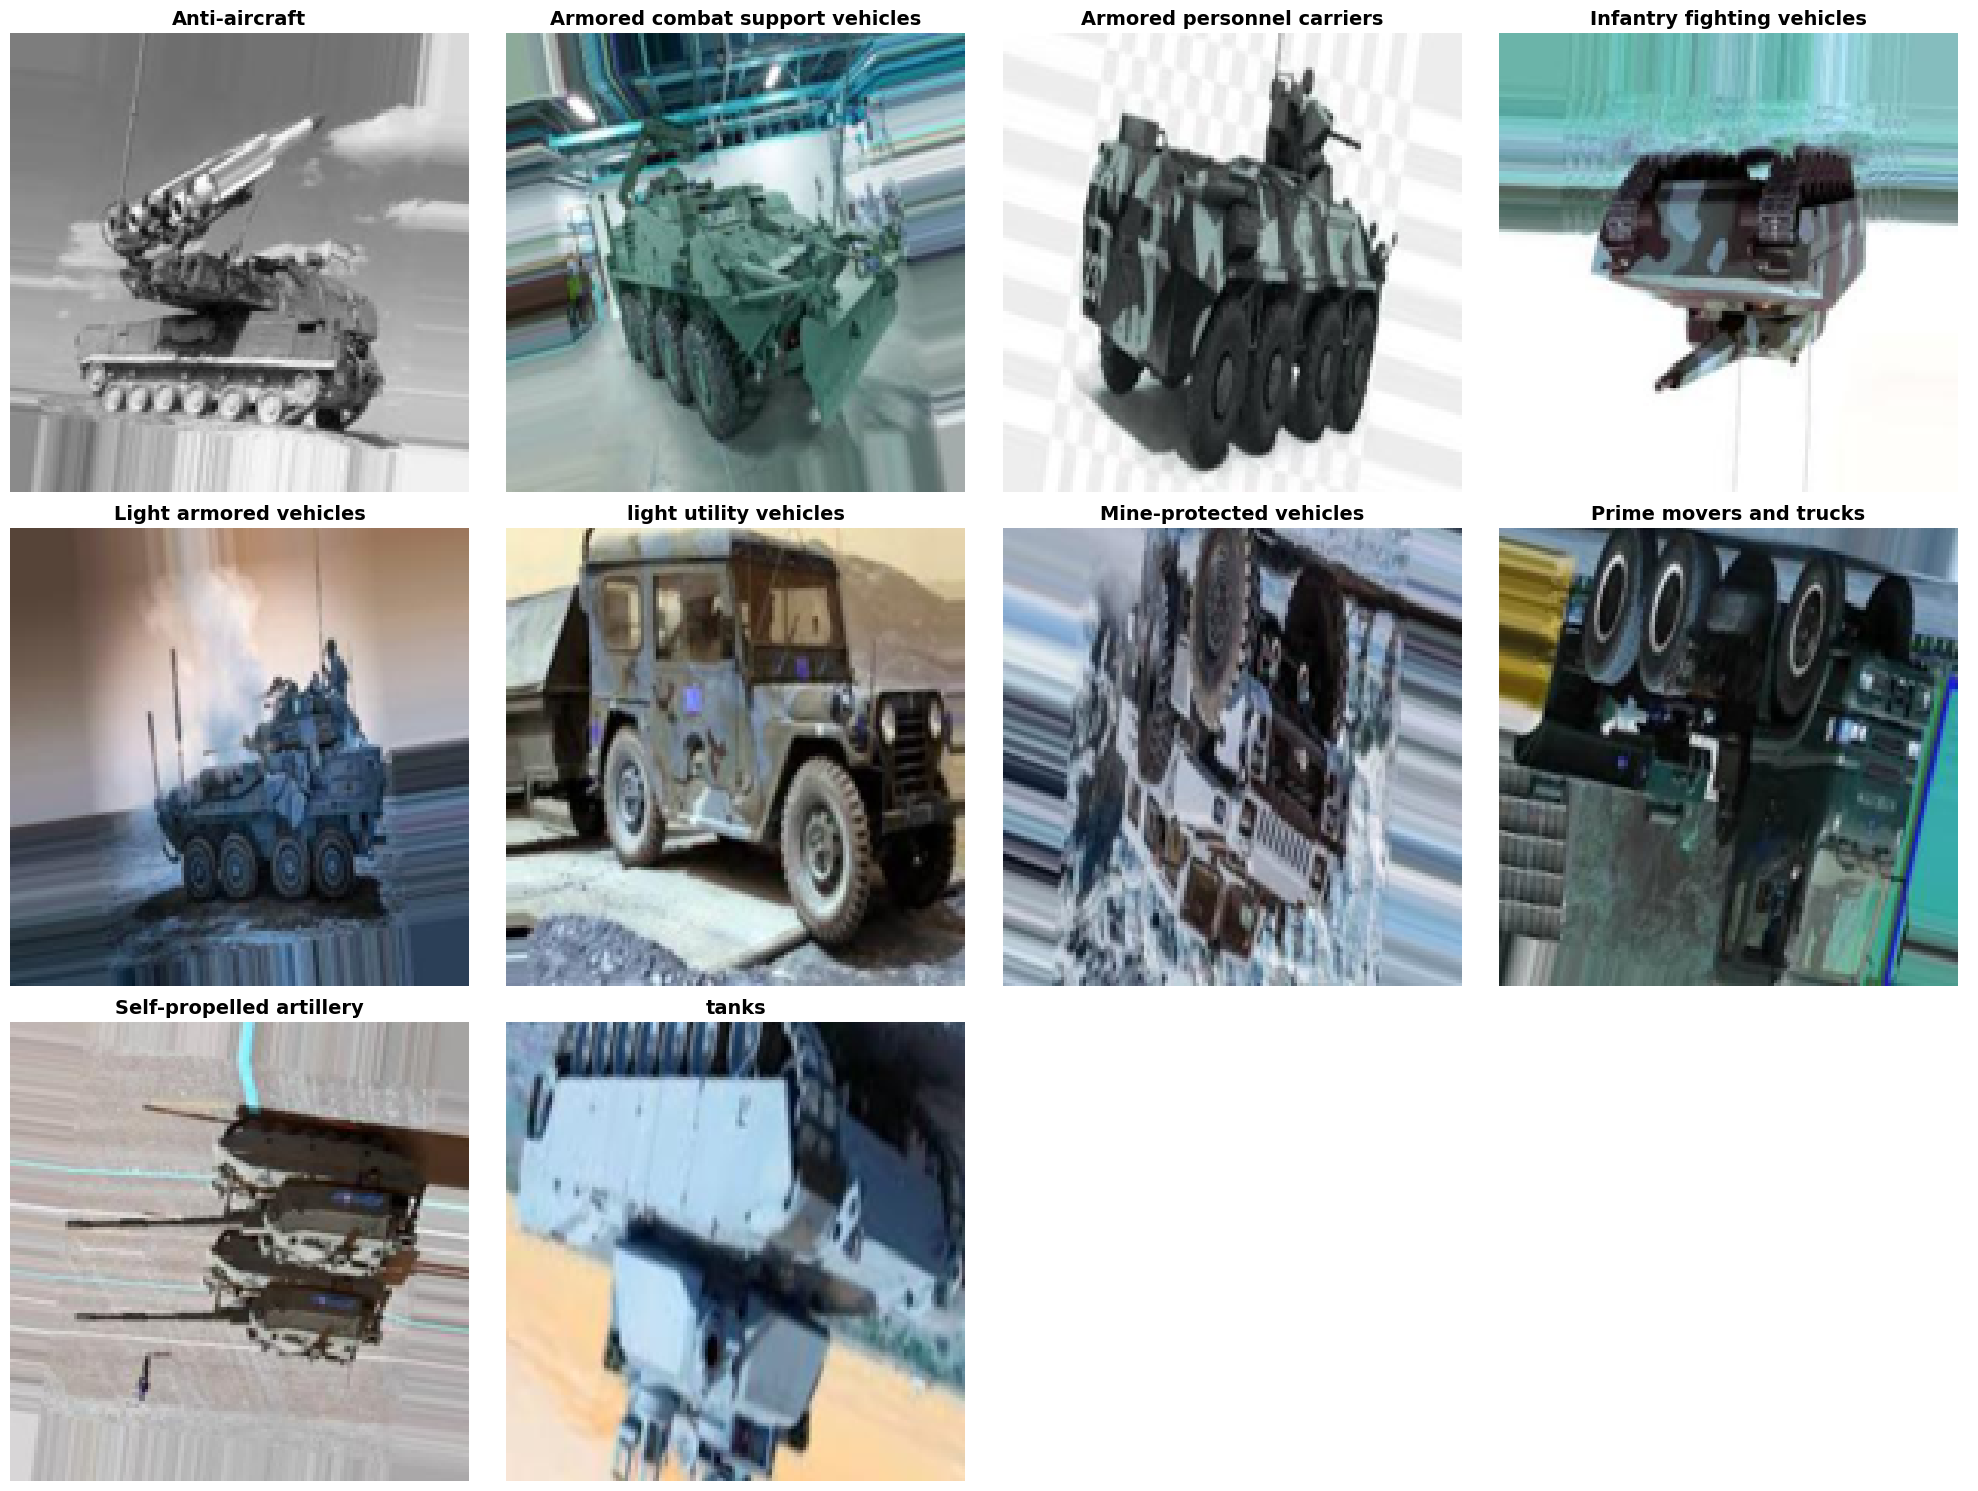

In [31]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the base directory path in WSL format
base_dir = '/mnt/d/newDownloads/10ClassMilDataset/dataset/train'
resize_size = (150, 150)  # Define the size to which all images will be resized

def get_random_image_paths(base_path):
    image_paths = {}
    
    # Iterate over each class directory
    for class_folder in os.listdir(base_path):
        class_path = os.path.join(base_path, class_folder)
        if os.path.isdir(class_path):
            print(f"Checking class directory: {class_path}")  # Debug: print current class path
            # Look for image files in the class subfolder
            image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
            if image_files:
                # Pick a random image from the list
                image_path = os.path.join(class_path, random.choice(image_files))
                print(f"Selected random image for class '{class_folder}': {image_path}")  # Debug: print selected image path
                image_paths[class_folder] = image_path
    return image_paths

def display_images(image_paths):
    if not image_paths:
        raise ValueError("No images found. Check the directory structure and image formats.")
    
    # Create a grid with 4 columns, adjust rows based on number of classes
    num_classes = len(image_paths)
    num_rows = (num_classes + 3) // 4  # Adjust rows for any number of classes
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
    axes = axes.flatten() if num_classes > 1 else [axes]  # Handle case with a single class

    for ax, (class_name, image_path) in zip(axes, image_paths.items()):
        try:
            img = Image.open(image_path)
            img = img.resize(resize_size)  # Resize image
            ax.imshow(img)
            ax.set_title(class_name, fontdict={'fontsize': 14, 'fontweight': 'bold'})
            ax.axis('off')
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            ax.axis('off')
    
    # Hide any extra subplots
    for ax in axes[len(image_paths):]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Get random image paths and display images
image_paths = get_random_image_paths(base_dir)
display_images(image_paths)
